## Clone GitHub reposiroty for accessing Data

In [1]:
!git clone https://github.com/UCSD-AI4H/COVID-CT.git

fatal: destination path 'COVID-CT' already exists and is not an empty directory.


## Unzip Images of COVID and NON-COVID

In [2]:
## unzip archives  q - quite, n - don't overwrite
!unzip -q -n '/content/COVID-CT/Images-processed/CT_COVID.zip'
!unzip -q -n '/content/COVID-CT/Images-processed/CT_NonCOVID.zip'

## Rename all the images so it will be easy to use later on

### And print no. of images from both classes

In [3]:
import os

path='/content/CT_COVID/'

# Iterate through folder to get images one by one

for count, filename in enumerate(os.listdir(path)): 
    dst ="covid-" + str(count) + ".png"
    src =path+ filename 
    dst =path+ dst 
        
    # rename() function will 
    # rename all the files 
    os.rename(src, dst)
print("Covid Positive cases: ", count)

path='/content/CT_NonCOVID/'

# Iterate through folder to get images one by one

for count, filename in enumerate(os.listdir(path)): 
    dst ="noncovid-" + str(count) + ".png"
    src =path+ filename 
    dst =path+ dst 
        
    # rename() function will 
    # rename all the files 
    os.rename(src, dst)

print("Covid Negative cases: ", count)

Covid Positive cases:  973
Covid Negative cases:  1113


## Create base directory

In [4]:
base_dir = '/content/covid19_CT'
if not os.path.exists(base_dir): os.mkdir(base_dir)

## Create train, test, and validation directory to save images in respective directory

In [5]:
train_dir = os.path.join(base_dir, 'train')
if not os.path.exists(train_dir): os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
if not os.path.exists(validation_dir):os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
if not os.path.exists(test_dir):os.mkdir(test_dir)

## Move appropriate no. of images to respective directory

### For COVID

In [6]:
original_dataset_dir_covid = '/content/CT_COVID/'
original_dataset_dir_non_covid = '/content/CT_NonCOVID/'

import shutil

# COVID - Train

fnames = ['covid-{}.png'.format(i) for i in range(250)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_covid, fname)
    dst = os.path.join(train_dir, fname)
    #print(src,dst)
    try:
      shutil.copyfile(src, dst)
    except:
      pass

# COVID - Validation
    
fnames = ['covid-{}.png'.format(i) for i in range(250, 300)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_covid, fname)
    dst = os.path.join(validation_dir, fname)
    try:
      shutil.copyfile(src, dst)
    except:
      pass

# COVID - Test

fnames = ['covid-{}.png'.format(i) for i in range(300, 348)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_covid, fname)
    dst = os.path.join(test_dir, fname)
    try:
      shutil.copyfile(src, dst)
    except:
      pass

### For NON-COVID

In [7]:
# NON-COVID - Train

fnames = ['noncovid-{}.png'.format(i) for i in range(250)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_non_covid, fname)
    dst = os.path.join(train_dir, fname)
    try:
      shutil.copyfile(src, dst)
    except:
      pass

# NON-COVID - Validation

fnames = ['noncovid-{}.png'.format(i) for i in range(250, 300)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_non_covid, fname)
    dst = os.path.join(validation_dir, fname)
    try:
      shutil.copyfile(src, dst)
    except:
      pass

# NON-COVID - Test

fnames = ['noncovid-{}.png'.format(i) for i in range(300, 348)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_non_covid, fname)
    dst = os.path.join(test_dir, fname)
    try:
      shutil.copyfile(src, dst)
    except:
      pass

## Import libraries and Initialize few parameters

In [8]:
import cv2
import numpy as np
from random import shuffle

# Pre-defined Image Size
IMG_SIZE = 224

# Learning rate
LR = 1e-4

## Make a Function to Label images to respective classes (Covid : 1, Non-Covid : 0)

In [9]:
def label_img(img):
    word_label = img.split('-')[0]
    if word_label == 'covid': return 1
    elif word_label == 'noncovid': return 0

## Make a Function to create Dataset with appropriate size for model (Here VGG16)

#### Since VGG16 expect input_size =  (224,224,3) Resize images to (224,224,3)
#### Then Normalize Image and append to respective array


In [10]:
def createDataSplitSet(datapath):
    X=[] # to save image pixels values
    y=[] # to save labels

    for img in os.listdir(datapath):
        label = label_img(img)
        path = os.path.join(datapath, img)
        image = cv2.resize(cv2.imread(path), (IMG_SIZE, IMG_SIZE))
        image = cv2.normalize(image, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)

        X.append(np.array(image))
        y.append(label)

    return np.array(X), np.array(y)

### Make train, test, and validation dataset

In [11]:
train_X, train_y = createDataSplitSet(train_dir)
val_X, val_y = createDataSplitSet(validation_dir)
test_X, test_y = createDataSplitSet(test_dir)

print(train_X.shape)
print(val_X.shape)
print(test_X.shape)

(500, 224, 224, 3)
(100, 224, 224, 3)
(96, 224, 224, 3)


## VGG16 :

The VGG-16 is one of the most popular pre-trained models for image classification. Introduced in the famous ILSVRC 2014 Conference, it was and remains THE model to beat even today. Developed at the Visual Graphics Group at the University of Oxford, VGG-16 beat the then standard of AlexNet and was quickly adopted by researchers and the industry for their image Classification Tasks.

The following are the layers of the model:

Convolutional Layers = 13
Pooling Layers = 5
Dense Layers = 3

Let us explore the layers in detail:

1. Input: Image of dimensions (224, 224, 3).
2. Convolution Layer Conv1:
    - Conv1-1: 64 filters
    - Conv1-2: 64 filters and Max Pooling
    - Image dimensions: (224, 224)
3. Convolution layer Conv2: Now, we increase the filters to 128
    - Input Image dimensions: (112,112)
    - Conv2-1: 128 filters
    - Conv2-2: 128 filters and Max Pooling
4. Convolution Layer Conv3: Again, double the filters to 256, and now add another convolution layer
    - Input Image dimensions: (56,56)
    - Conv3-1: 256 filters
    - Conv3-2: 256 filters
    - Conv3-3: 256 filters and Max Pooling
5. Convolution Layer Conv4: Similar to Conv3, but now with 512 filters
    - Input Image dimensions: (28, 28)
    - Conv4-1: 512 filters
    - Conv4-2: 512 filters
    - Conv4-3: 512 filters and Max Pooling
6. Convolution Layer Conv5: Same as Conv4
    - Input Image dimensions: (14, 14)
    - Conv5-1: 512 filters
    - Conv5-2: 512 filters
    - Conv5-3: 512 filters and Max Pooling
    - The output dimensions here are (7, 7). At this point, we flatten the output of this layer to generate a feature vector
7. Fully Connected/Dense FC1: 4096 nodes, generating a feature vector of size(1, 4096)
8. Fully ConnectedDense FC2: 4096 nodes generating a feature vector of size(1, 4096)
9. Fully Connected /Dense FC3: 4096 nodes, generating 1000 channels for 1000 classes. This is then passed on to a Softmax activation function
10. Output layer

<img src="vgg16.png">

## Import libraries and Initialize Model with target size

In [12]:
## VGG 16

from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Input, Flatten
from tensorflow.keras import Model

# Input shape
img_input = Input(shape=(IMG_SIZE, IMG_SIZE, 3))

### We can use two ways for transfer learning :
#### 1) Fine Tuning
#### 2) Feature Extraction

As we have already trained models available we will start with Fine Tuning since it will perform more better.

#### Since we are using 'Fine Tuning' Approach we set 'include_top'=True, otherwise we have to set it to False

#### We are going to initialize model by weights='imagenet'

In [13]:
# Initialize model with appropriate parameters
model = VGG16(
    include_top=True,   # initialize with all layers
    weights="imagenet", # pre-trained weights of 'imagenet'
    input_tensor=img_input  # input shape
)

# Print Summary Of the Model
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

### To Fine Tune the model we are extending the model layers according to our needs

In [25]:
from tensorflow.keras.layers import Dropout

# we want to join our custom layers at the end of the model
# so fetch output of the pre-trained model's last pooling layer

last_layer = model.get_layer('block5_pool').output
x= Flatten(name='flatten')(last_layer)
x = Dense(512, activation='relu', name='fc1')(x)

# add dropout to deal with overfitting

x = Dropout(0.2)(x)

# Since it's binary classification project we weill use 'sigmoid' activation
out = Dense(1, activation='sigmoid', name='output')(x)  ## 2 classes

# build model with parameteres defined before
model = Model(img_input, out)

# we are not going to train last 3 layers since we want to replace it with our layers

for layer in model.layers[:-3]:
	layer.trainable = False

model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

### Compile Model

#### Set Parameters :

Initial Learning rate = 1e-4

Epochs = 50

optimizer = 'Adam' with decayed learning rate so model learn better

loss = 'binary_crossentropy'

In [26]:
from tensorflow.keras.optimizers import Adam

INIT_LR = 1e-4
EPOCHS = 50

# define optimizer
opt = Adam(learning_rate=INIT_LR, decay=INIT_LR/EPOCHS)

# compile model
model.compile(loss='binary_crossentropy',
              optimizer=opt,
              metrics=['acc'])

### Set callbacks to avoid Overtraing( to get rid of Overfitting) and Save only best model

We are going to monitor model performance by "val_loss"
and if model's loss stop decreasing for '5' epochs continuous then it will stop traing. - it's called early stopping

We are going to save best model only

In [27]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
my_callbacks = [
    EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True),
    ModelCheckpoint(filepath='vgg16_model.h5', save_best_only=True),
]

### Start model training

In [28]:
history = model.fit(train_X, train_y,
                              batch_size=20,
                              epochs=EPOCHS, 
                              validation_data=(val_X, val_y),
                              callbacks=my_callbacks)

Epoch 1/50
25/25 [==============================] - 8s 278ms/step - loss: 0.7488 - acc: 0.6240 - val_loss: 0.4207 - val_acc: 0.8400
Epoch 2/50
25/25 [==============================] - 7s 264ms/step - loss: 0.3374 - acc: 0.8620 - val_loss: 0.3187 - val_acc: 0.8800
Epoch 3/50
25/25 [==============================] - 6s 254ms/step - loss: 0.2062 - acc: 0.9400 - val_loss: 0.3258 - val_acc: 0.8500
Epoch 4/50
25/25 [==============================] - 6s 255ms/step - loss: 0.1513 - acc: 0.9620 - val_loss: 0.2565 - val_acc: 0.8800
Epoch 5/50
25/25 [==============================] - 7s 265ms/step - loss: 0.1030 - acc: 0.9820 - val_loss: 0.2528 - val_acc: 0.8900
Epoch 6/50
25/25 [==============================] - 6s 255ms/step - loss: 0.0672 - acc: 0.9980 - val_loss: 0.2412 - val_acc: 0.9100
Epoch 7/50
25/25 [==============================] - 7s 266ms/step - loss: 0.0547 - acc: 0.9980 - val_loss: 0.2290 - val_acc: 0.9100
Epoch 8/50
25/25 [==============================] - 6s 256ms/step - loss: 0.

### Plot Accuracy and Loss Graphs

### Training Accuracy & Validation Accuracy compares to no. of epochs

### Training loss & Validation loss compares to no. of epochs

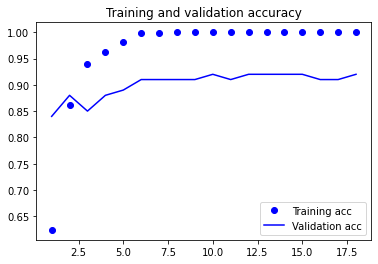

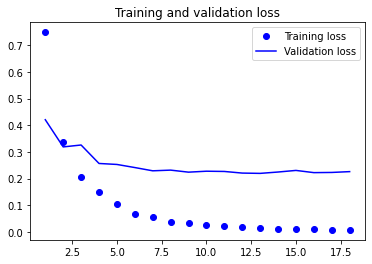

In [29]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### We can see Accuracy curve going upwards 
### and Loss curve going down as epoch passes 
### which means model actually learning

In [30]:
# Let's print all the metrics with it's score

from sklearn.metrics import accuracy_score

## Test Accuracy
predictions = model.predict(test_X)
ypred = predictions > 0.5
test_acc = accuracy_score(test_y, ypred)

from sklearn.metrics import precision_recall_fscore_support, roc_auc_score

precision, recall, f1score, _ = precision_recall_fscore_support(test_y, ypred, average='binary')

auc = roc_auc_score(test_y, ypred)

print("Train Accuracy:\t", acc[-1])
print("Val Accuracy:\t", val_acc[-1])
print("Test Accuracy:\t", test_acc)
print("Precision:\t", precision)
print("Recall:\t\t", recall)
print("F1 Score:\t", f1score)
print("AUC:\t\t", auc)


Train Accuracy:	 1.0
Val Accuracy:	 0.9200000166893005
Test Accuracy:	 0.9166666666666666
Precision:	 0.9
Recall:		 0.9375
F1 Score:	 0.9183673469387755
AUC:		 0.9166666666666667


## Let's Compare Result with Previously trained models


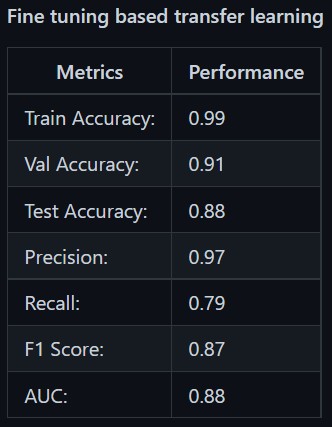

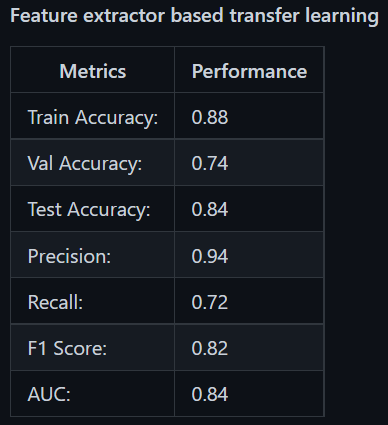

## Here's our updated result which is state of the art compared to others showed above :

|  Metrics |  Performance | 
|---|---|
|  Train Accuracy  | 1.0 |
|  Val Accuracy    | 0.92 |
|  Test Accuracy   | 0.92 |
|   Precision      | 0.9 |
|   Recall         | 0.94 |
| F1 Score         | 0.92 |
| AUC              | 0.92 |